# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Bianca Beer

Datum: 21.11.2023

Gruppe: 77

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Lässt sich das Newtonsche Abkühlungsgesetz anhand des folgenden Versuchs bestätigen?
Welcher Transportkoeffizient ergibt sich für eine Tasse Tee?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


Der Versuchsaufbau besteht allein aus einer Tasse gefüllt mit Tee und zwei Sensoren. Ein Sensor misst dabei die Temperatur in der Tasse und der andere in der Umgebung. Die Messung läuft über ca. 10 Minuten.

<img src="figures/experiment_newton.jpeg" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
hdf5_path = "data/newton/newton.h5"

# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

# HDF5-File auslesen
f = h5.File(hdf5_path, "r")

# save dataset time in HDF5-File to variable timestamps.
timestamps1 = list(f["RawData/1ee866a2-a87b-6a9e-bb8d-067b4c8ccc7c/time"])
time1 = timestamps1 - timestamps1[0]  # erster Zeitpunkt als Nullpunkt festlegen und folgende Zeitschritte relativ dazu
# save dataset temperature in HDF5-File to variable temperature.
temperature1 = list(f["RawData/1ee866a2-a87b-6a9e-bb8d-067b4c8ccc7c/temperature"]) # in der Umgebung

# save dataset temperature in HDF5-File to variable temperature.
temperature2 = list(f["RawData/1ee8667b-987d-619a-a625-f52b99d6425c/temperature"]) # im Tee

# Temperaturdifferenz
temp_dif = []
for i in range(len(temperature2)):
    temp_dif.append(temperature2[i] - temperature1[i])

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


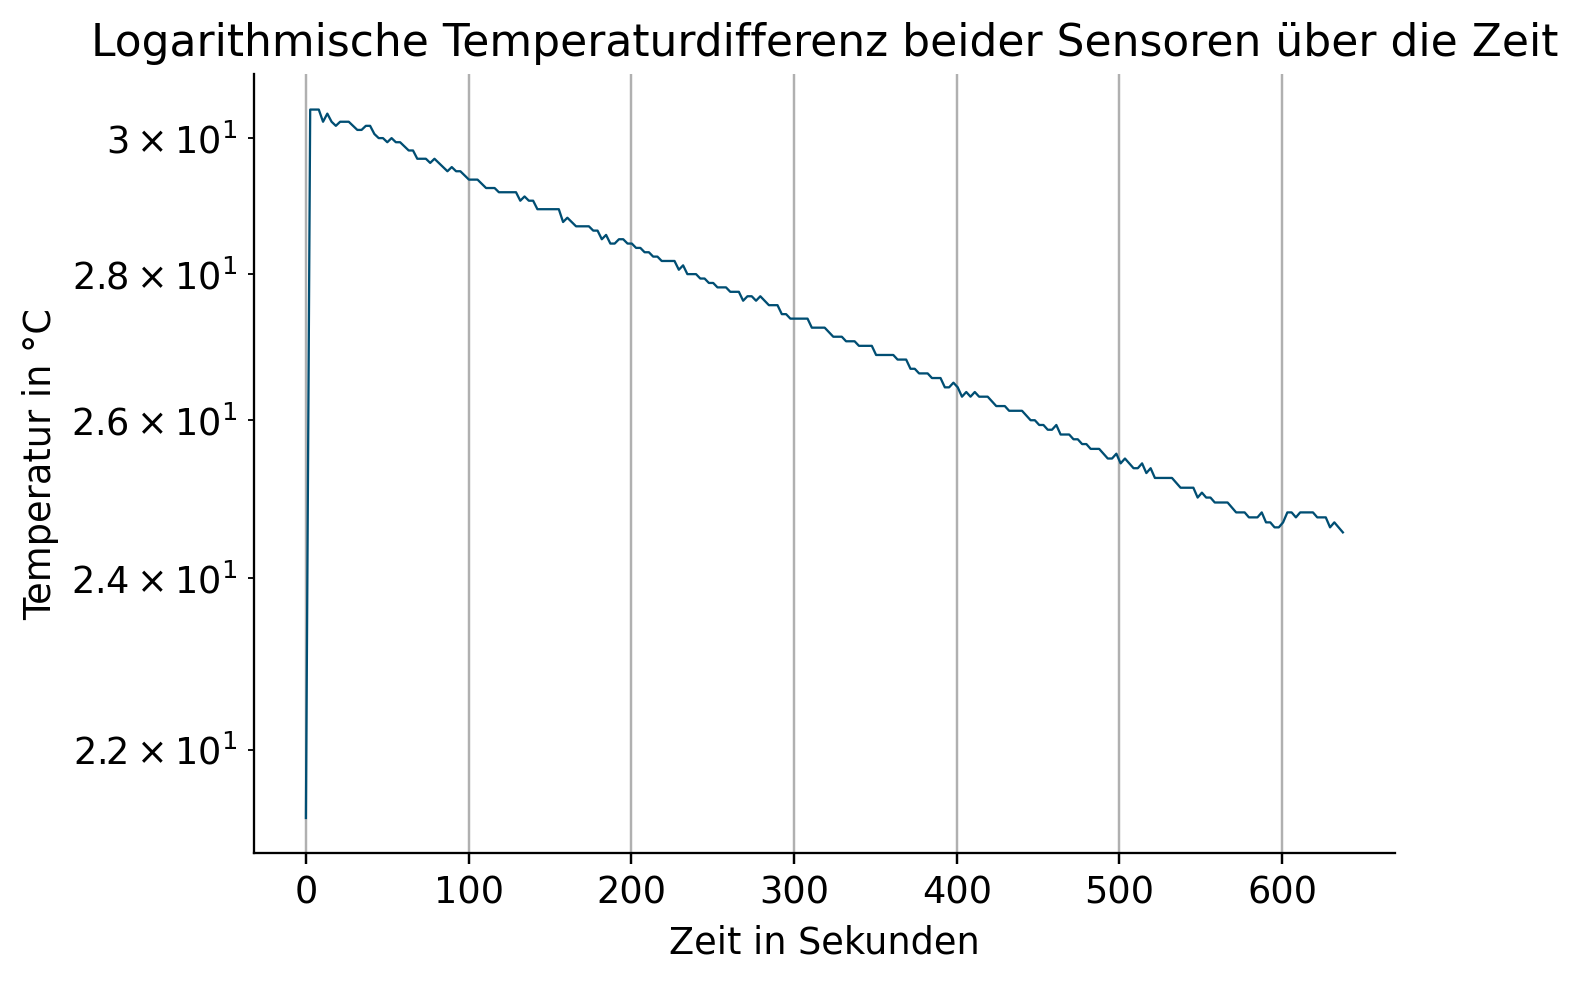

In [5]:
# TODO: Use the temperature and time data for plotting

# Diagramm plotten
plt.plot(time1, temp_dif)
plt.yscale('log')  # Logarithmische Skala

# Titel, Achsenbeschriftungen und Gitter hinzufügen
plt.title("Logarithmische Temperaturdifferenz beider Sensoren über die Zeit")
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperatur in °C")
plt.grid(True)   # Gitter 

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [6]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz 
T1 = temperature2[0]
T2 = np.mean(temperature1)
K = np.polyfit(time1, np.log(temp_dif/(T1-T2)), 1)[0]
# DONE #

#### (iV) Ergebnis

In [7]:
# TODO: Print result
print("Transportkoeffizient: K = " + str(K)+ "/s")

# HDF5-Datei schließen
f.close()
# DONE #

Transportkoeffizient: K = -0.00033724931400960653/s


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Ergebnis für den Transportkoeffizient im Tee ist beträgt -0,000337/s. 
Letztendlich lässt sich das Newtonsche Abkühlungsgesetz durch den Versuch nicht bestätigen. Das ist darauf zurückzuführen, dass der Versuch zum Bestätigen eines Naturgesetzes zu kurz und unkontrolliert ist. Die Temperaturdifferenz nimmt nahezu linear ab, da sich zum Ende des Versuchsverlaufs (nach ca. 10 Minuten) die Temperatur nur wenig verändert hat, sodass ein Unterschied der Temperatursabfallsrate kaum zu bemerken ist. Würde man den Versuch für einen längeren Zeitraum durchführen, ist zu erwarten, dass der Unterschied sich vergrößert und das Gesetz bestätigt. Außerdem ist die Messung zu unkontrolliert, sodass sich schnell Messungenauigkeiten ergeben. Insbesondere am Anfang ist dies zu sehen, da dort der Sensor der Umgebungstemperatur 31,4375°C misst, wobei durch die folgenden Messungen davon auszugehen ist, dass der Wert sehr unwahrscheinlich ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Bei dem Versuch durfte ich lernen, wie wichtig es ist, gründlich zu arbeiten, da ich den Versuch aufgrund kleinerer Fahler einige Male durchführen musste, weil ich bspw. die Sensoren falschherum angebracht hatte, was dann dem zugrundeliegenden JSON-Dateien widersprochen hätte. Außerdem konnte ich sehen, wie komplex und trotzdem simpel die experimentelle Ermittlung von Materialgrößen ist. Genauso habe ich jedoch auch erkannt, dass zur wissenschaftlichen Bestätigung von Naturgesetzen z. B. mehr Zeit und Genauigkeit gegeben sein muss, da sonst Fehler beim Messen, sowie ungenügend Daten zu einem ungenauen und wenig aussagekräftigen Ergebnis führen.